# Trieu / m2

In [732]:
!pip install squarify
import squarify 

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [733]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
import random
import math
import squarify 

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
No handles with labels found to put in legend.
<ipython-input-734-a8714d615b6b>:25: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = dataframe.quantile(0.25)
<ipython-input-734-a8714d615b6b>:28: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dataframe = dataframe[~((datafr

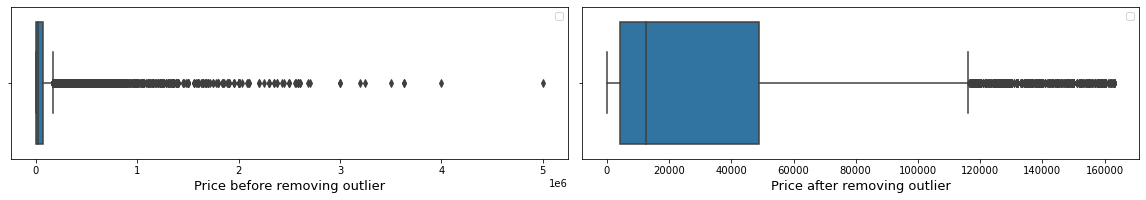

In [734]:
dataframe = pd.read_csv("final_eda.csv")
dataframe = dataframe.rename(columns={'House Direction': 'HouseDirection', 'Balcony Direction': 'BalconyDirection'})
dataframe.head()

# Fill nan
# dataframe['Facade'].fillna(dataframe['Facade'].mean(), inplace=True)
dataframe['Facade'].fillna('None', inplace=True)
# dataframe['Entrance'].fillna(dataframe['Entrance'].mode()[0], inplace=True)
dataframe['Entrance'].fillna('None', inplace=True)

dataframe['Area'].fillna(dataframe['Area'].mean(), inplace=True)
dataframe['Ward'] = dataframe['Ward'].fillna('None')
dataframe['Street'] = dataframe['Street'].fillna('None')
dataframe.isnull().sum()

# Drop the wrong value
a = dataframe[dataframe['District']=="hà nội  long biên"]
dataframe.loc[dataframe['District']=="hà nội  long biên", 'District'] = "long biên" 


fig = plt.figure(figsize=(16,16))
for index, col in enumerate(['Price', 'Price']):
    label = "Price before removing outlier"
    if index==1:
        Q1 = dataframe.quantile(0.25)
        Q3 = dataframe.quantile(0.75)
        IQR = Q3 - Q1
        dataframe = dataframe[~((dataframe < (Q1 - 1.5 * IQR)) |(dataframe > (Q3 + 1.5 * IQR))).any(axis=1)]
        dataframe.Price.describe()
        label = "Price after removing outlier"

    plt.subplot(6,2,index+1)
    t = sns.boxplot(x = dataframe['Price'])
    t.set_xlabel(xlabel=label, fontsize=13)
    t.legend()
fig.tight_layout(pad=1.0);

In [735]:
dataframe = pd.read_csv("final_eda.csv")
dataframe = dataframe.rename(columns={'House Direction': 'HouseDirection', 'Balcony Direction': 'BalconyDirection'})
dataframe.head()

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index,HouseDirection,BalconyDirection,Bedrooms,Toilets,Legits,Floors,Facade,Entrance,District,Ward,Street,Area,Price,X,Y
0,0,nam,bắc,3,2,None,None,NaN,NaN,tây hồ,phú thượng,none,100.00,4000.000,21.087703,105.804831
1,1,nam,bắc,2,2,+đỏ+hồng,None,NaN,NaN,tây hồ,phú thượng,võ chí công,80.74,3496.042,21.087703,105.804831
2,2,None,None,3,3,+đỏ+hồng,None,NaN,NaN,cầu giấy,yên hòa,dương đình nghệ,131.00,5900.000,21.018631,105.798636
3,3,None,None,5,None,+đỏ+hồng,5,NaN,NaN,long biên,bồ đề,bồ đề,52.00,6750.000,21.038845,105.875416
4,4,None,None,3,2,+đỏ+hồng,None,NaN,NaN,nam từ liêm,cầu diễn,hàm nghi,119.00,5800.000,21.034359,105.762291


In [736]:
dataframe["Facade"].isnull().mean()

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.2777383487106695

In [737]:
# Checking the missing values
dataframe.isnull().mean()

index               0.000000
HouseDirection      0.000000
BalconyDirection    0.000000
Bedrooms            0.000000
Toilets             0.000000
Legits              0.000000
Floors              0.000000
Facade              0.277738
Entrance            0.825967
District            0.000000
Ward                0.000022
Street              0.000000
Area                0.000000
Price               0.000000
X                   0.000000
Y                   0.000000
dtype: float64

In [738]:
# Fill nan
# dataframe['Facade'].fillna(dataframe['Facade'].mean(), inplace=True)
dataframe['Facade'].fillna('None', inplace=True)
# dataframe['Entrance'].fillna(dataframe['Entrance'].mode()[0], inplace=True)
dataframe['Entrance'].fillna('None', inplace=True)
# dataframe['Area'].fillna(dataframe['Area'].mean(), inplace=True)
dataframe['Area'].fillna('None', inplace=True)
dataframe['Ward'] = dataframe['Ward'].fillna('None')
dataframe['Street'] = dataframe['Street'].fillna('None')
dataframe.isnull().sum()

index               0
HouseDirection      0
BalconyDirection    0
Bedrooms            0
Toilets             0
Legits              0
Floors              0
Facade              0
Entrance            0
District            0
Ward                0
Street              0
Area                0
Price               0
X                   0
Y                   0
dtype: int64

In [739]:
# Drop the wrong value
a = dataframe[dataframe['District']=="hà nội  long biên"]
dataframe.loc[dataframe['District']=="hà nội  long biên", 'District'] = "long biên" 

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:2919: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  pct = percentile_func(x, rng, axis=axis, interpolation=interpolation,
/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use

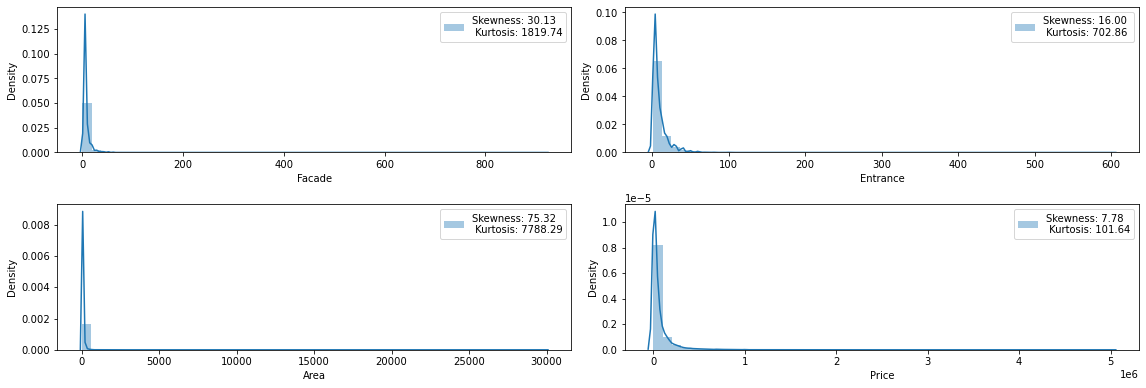

In [740]:
fig = plt.figure(figsize=(16,16))
for index, col in enumerate(['Facade', 'Entrance', 'Area', 'Price']):
    plt.subplot(6,2,index+1)
    t = sns.distplot(dataframe[dataframe[col] != 'None'].loc[:,col], label="Skewness: %.2f \n Kurtosis: %.2f" %(dataframe[dataframe[col] != 'None'].loc[:, col].skew(), dataframe[dataframe[col] != 'None'].loc[:, col].kurt()))
    t.legend()
fig.tight_layout(pad=1.0);

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


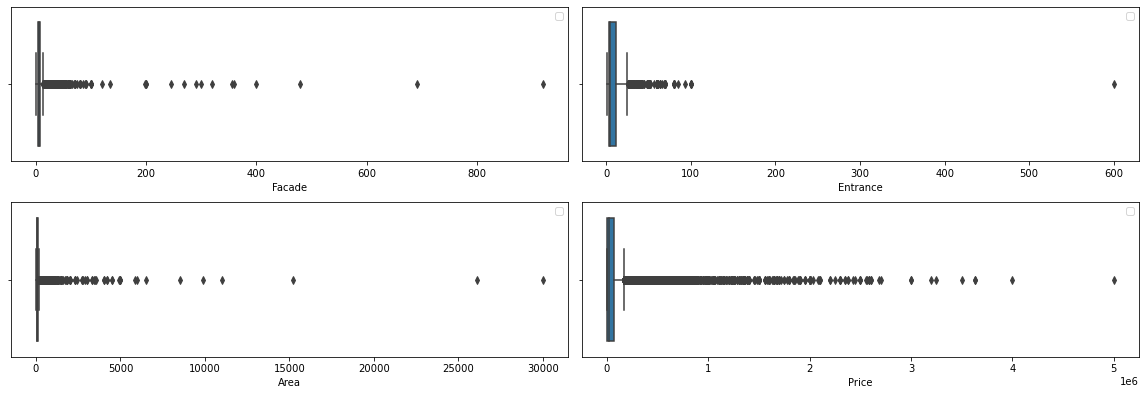

In [741]:
fig = plt.figure(figsize=(16,16))
for index, col in enumerate(['Facade', 'Entrance', 'Area', 'Price']):
    plt.subplot(6,2,index+1)
    t = sns.boxplot(x = dataframe[dataframe[col] != 'None'][col])
    t.legend()
fig.tight_layout(pad=1.0);

In [742]:
dataframe["PricePerm2"] = dataframe["Price"]/dataframe["Area"]
# dataframe.to_csv("update1.csv")

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [743]:
# dataframe['Facade'].unique()

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [744]:
print(len(dataframe))
for col in dataframe.columns:
    if "None" in dataframe[col].values:
        print(col, ":", dataframe[col].value_counts()["None"])
    else:
        print(col, ":", 0)

46497
index : 0
HouseDirection : 37988
BalconyDirection : 41321
Bedrooms : 8792
Toilets : 29559
Legits : 14584
Floors : 13847
Facade : 12914
Entrance : 38405
District : 0
Ward : 5275
Street : 5885
Area : 0
Price : 0
X : 0
Y : 0
PricePerm2 : 0


<ipython-input-744-0309369b22b4>:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if "None" in dataframe[col].values:
<ipython-input-744-0309369b22b4>:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if "None" in dataframe[col].values:


In [745]:
dataframe

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index,HouseDirection,BalconyDirection,Bedrooms,Toilets,Legits,Floors,Facade,Entrance,District,Ward,Street,Area,Price,X,Y,PricePerm2
0,0,nam,bắc,3,2,None,None,None,None,tây hồ,phú thượng,none,100.00,4000.000,21.087703,105.804831,40.000000
1,1,nam,bắc,2,2,+đỏ+hồng,None,None,None,tây hồ,phú thượng,võ chí công,80.74,3496.042,21.087703,105.804831,43.300000
2,2,None,None,3,3,+đỏ+hồng,None,None,None,cầu giấy,yên hòa,dương đình nghệ,131.00,5900.000,21.018631,105.798636,45.038168
3,3,None,None,5,None,+đỏ+hồng,5,None,None,long biên,bồ đề,bồ đề,52.00,6750.000,21.038845,105.875416,129.807692
4,4,None,None,3,2,+đỏ+hồng,None,None,None,nam từ liêm,cầu diễn,hàm nghi,119.00,5800.000,21.034359,105.762291,48.739496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46492,21221,None,None,4,None,+đỏ+hồng,4,3.0,None,thanh xuân,thượng đình,nguyễn trãi,54.00,48000.000,20.997660,105.812218,888.888889
46493,21222,None,None,4,None,+đỏ+hồng,5,3.0,None,thanh xuân,khương trung,khương trung,75.00,65000.000,20.999841,105.818591,866.666667
46494,21223,None,None,4,None,+đỏ+hồng,4,3.0,None,đống đa,láng hạ,láng,40.00,43000.000,21.014730,105.811772,1075.000000
46495,21224,None,None,4,None,None,5,3.0,None,đống đa,cát linh,hào nam,42.00,76000.000,21.029292,105.830226,1809.523810


In [746]:
dataframe.Price.describe()

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    4.649700e+04
mean     7.070434e+04
std      1.641354e+05
min      1.400000e+01
25%      4.500000e+03
50%      1.950000e+04
75%      6.800000e+04
max      5.000000e+06
Name: Price, dtype: float64

In [747]:
#dataframe = dataframe[dataframe["Price"] > dataframe.Price.quantile(0.25)]
#dataframe = dataframe[dataframe["Price"] < dataframe.Price.quantile(0.75)]
"""Q1 = dataframe.quantile(0.25)
Q3 = dataframe.quantile(0.75)
IQR = Q3 - Q1
dataframe = dataframe[~((dataframe < (Q1 - 1.5 * IQR)) |(dataframe > (Q3 + 1.5 * IQR))).any(axis=1)]
dataframe.Price.describe()"""

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'Q1 = dataframe.quantile(0.25)\nQ3 = dataframe.quantile(0.75)\nIQR = Q3 - Q1\ndataframe = dataframe[~((dataframe < (Q1 - 1.5 * IQR)) |(dataframe > (Q3 + 1.5 * IQR))).any(axis=1)]\ndataframe.Price.describe()'

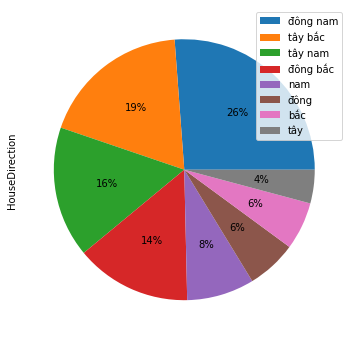

In [748]:
plt.figure(figsize=(20, 6))
dataframe[dataframe['HouseDirection']!='None'].HouseDirection.value_counts(normalize=True).plot(kind='pie', labeldistance=None, autopct="%1.0f%%", legend=True)
plt.show()

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1841: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


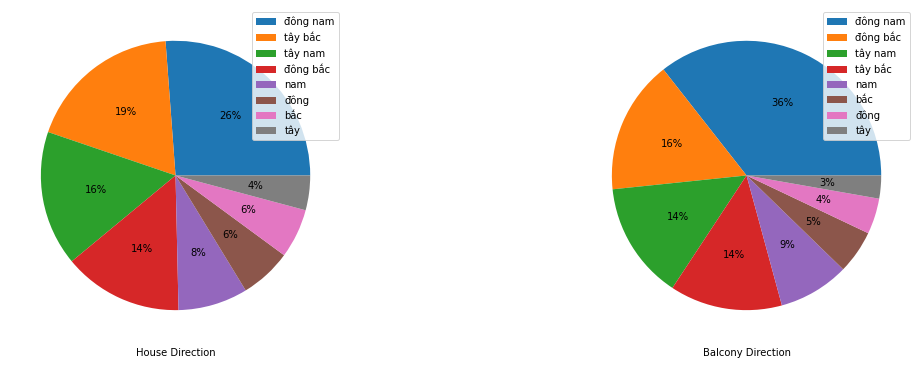

In [749]:
fig = plt.figure(figsize=(16,30))
labels = ["House Direction", "Balcony Direction"]
for index, col in enumerate(["HouseDirection", "BalconyDirection"]):
    plt.subplot(6,2,index+1)
    t = dataframe[dataframe[col]!='None'][col].value_counts(normalize=True).plot(kind='pie', labeldistance=None, autopct="%1.0f%%", legend=True)
    t.set_xlabel(labels[index])
    t.set_ylabel("")
    t.legend()
fig.tight_layout(pad=1.0);

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-750-8d4061eb1f93>:5: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  tick.label.set_fontsize(10)


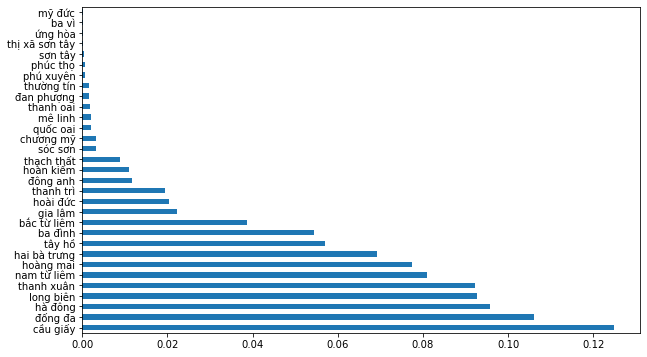

In [750]:
plt.figure(figsize=(10,6))
dataframe[dataframe['District']!='None'].District.value_counts(normalize=True).plot.barh()
ax = plt.gca()
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)
plt.show()

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


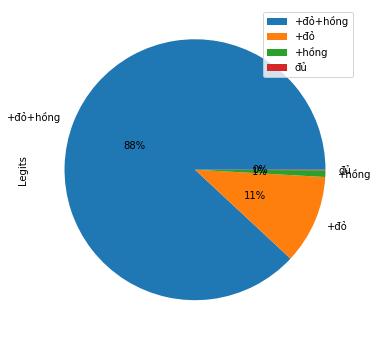

In [751]:
plt.figure(figsize=(20, 6))
dataframe[dataframe['Legits']!='None'].Legits.value_counts(normalize=True).plot(kind='pie',pctdistance=0.5, labeldistance=1.1, autopct="%1.0f%%", legend=True)
plt.show()

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-752-336f27a3f107>:8: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  tick.label.set_fontsize(10)


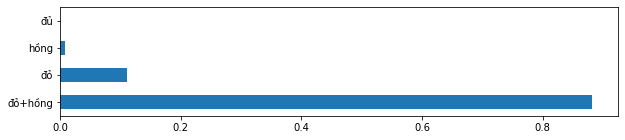

In [752]:
plt.figure(figsize=(10,2))
dataframe['Legits'] = dataframe['Legits'].replace(['+đỏ'], 'đỏ')
dataframe['Legits'] = dataframe['Legits'].replace(['+hồng'], 'hồng')
dataframe['Legits'] = dataframe['Legits'].replace(['+đỏ+hồng'], 'đỏ+hồng')
dataframe[dataframe['Legits']!='None'].Legits.value_counts(normalize=True).plot.barh()
ax = plt.gca()
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)
plt.show()

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<function matplotlib.pyplot.show(close=None, block=None)>

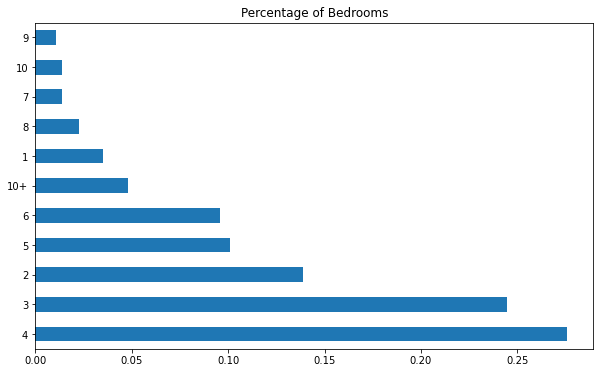

In [753]:
plt.figure(figsize=(10,6))
plt.title("Percentage of Bedrooms")
dataframe[dataframe['Bedrooms']!='None'].Bedrooms.value_counts(normalize=True).plot.barh()
plt.show

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<function matplotlib.pyplot.show(close=None, block=None)>

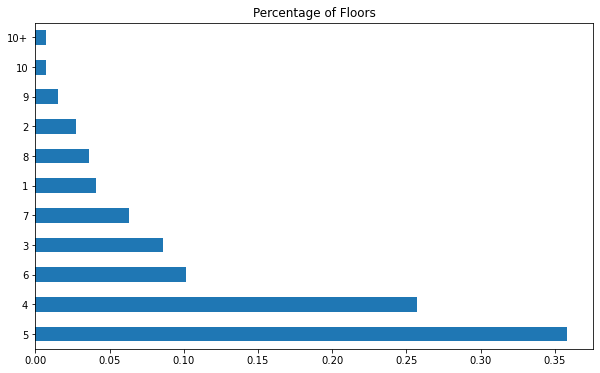

In [754]:
plt.figure(figsize=(10,6))
plt.title("Percentage of Floors")
dataframe[dataframe['Floors']!='None'].Floors.value_counts(normalize=True).plot.barh()
plt.show

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


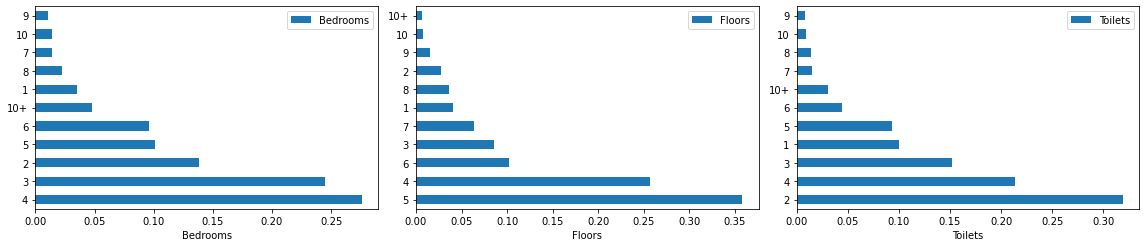

In [755]:
fig = plt.figure(figsize=(16,20))
labels = ["Bedrooms", "Floors", "Toilets"]
for index, col in enumerate(labels):
    plt.subplot(6,3,index+1)
    t = dataframe[dataframe[col]!='None'][col].value_counts(normalize=True).plot.barh()
    t.set_xlabel(labels[index])
    t.set_ylabel("")
    t.legend()
fig.tight_layout(pad=1.0);



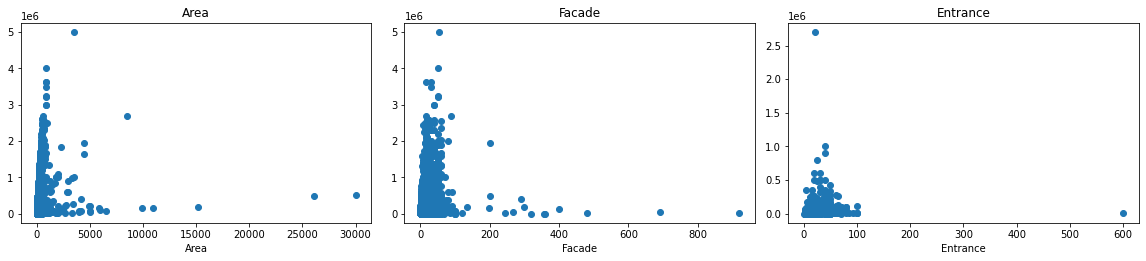

In [792]:
fig = plt.figure(figsize=(16,20))
labels = ["Area", "Facade", "Entrance"]
for index, col in enumerate(labels):
    plt.subplot(6,3,index+1)
    dataframe2 = dataframe[dataframe[col]!="None"]
    plt.scatter(dataframe2[col], dataframe2.Price)
    plt.xlabel(labels[index])
    plt.ylabel("")
    plt.title(labels[index])
    # t.egend()
fig.tight_layout(pad=1.0);

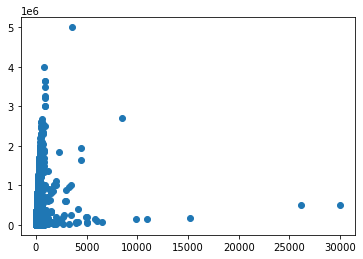

In [777]:
#Plot the scatter plot of price and area of the house
plt.scatter(dataframe.Area, dataframe.Price)

TypeError: 'value' must be an instance of str or bytes, not a float

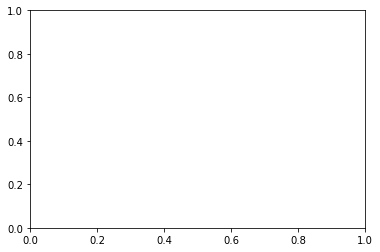

In [778]:
#Plot the scatter plot of price and fascade of the house
plt.scatter(dataframe.Facade, dataframe.Price)

In [758]:
#Plot the scatter plot of price and entrance of the house
plt.scatter(dataframe.Entrance, dataframe.Price)

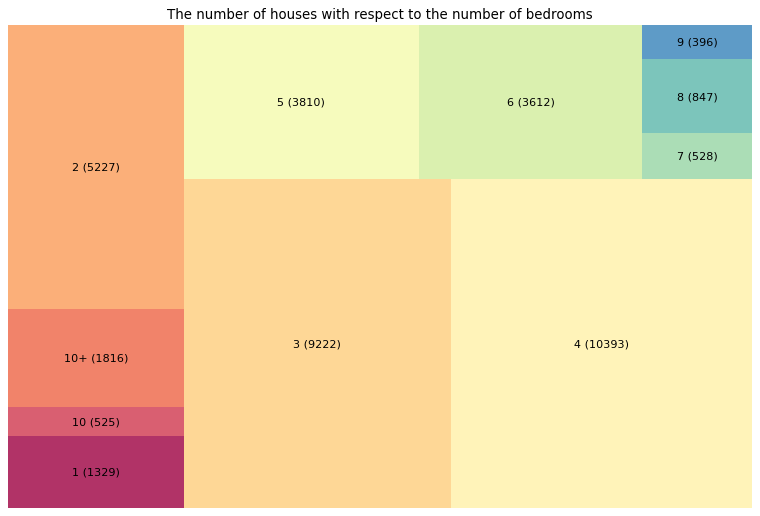

In [759]:
dataframe_for_bedroom1 = dataframe[dataframe['Bedrooms']!='None']
dataframe_for_bedroom1=dataframe_for_bedroom1.groupby('Bedrooms').size().reset_index(name='counts')
labels = dataframe_for_bedroom1.apply(lambda x: str(x[0]) + " (" + str(x[1]) + ")", axis=1)
sizes = dataframe_for_bedroom1['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

plt.title('The number of houses with respect to the number of bedrooms')
plt.axis('off')
plt.show()

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-760-8dbc7d982689>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dftmp3 = dftmp3[dataframe['Bedrooms']!='10+']
<ipython-input-760-8dbc7d982689>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(df_bedroom['Bedrooms'], rotation=60, horizontalalignment= 'right')


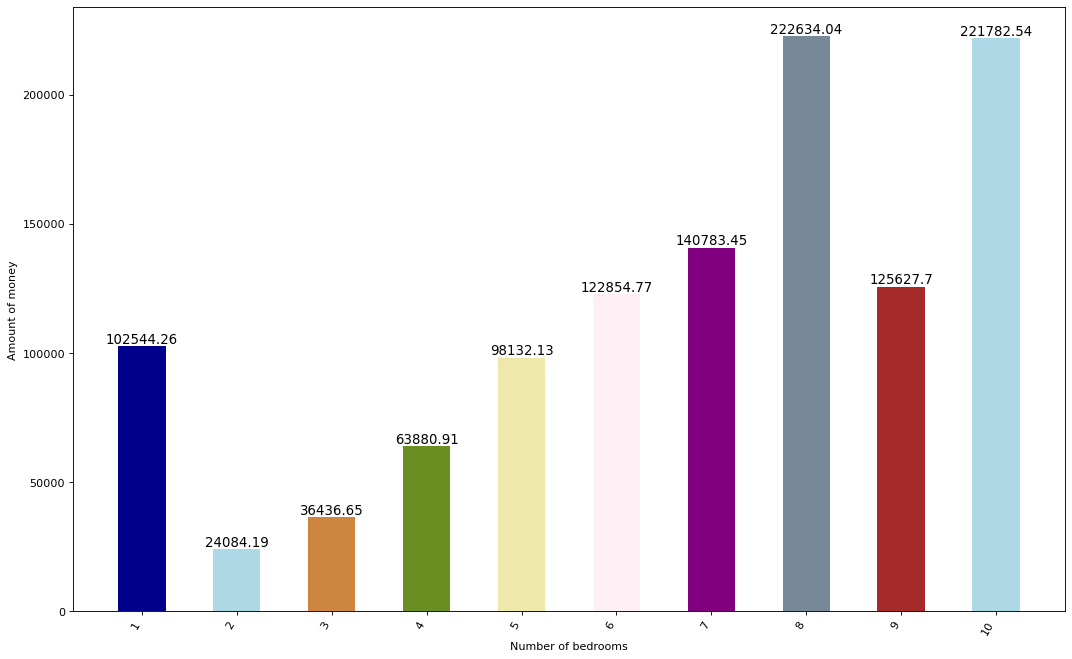

In [760]:
# pic?
dftmp3 = dataframe[dataframe['Bedrooms']!='None']
dftmp3 = dftmp3[dataframe['Bedrooms']!='10+']
df_bedroom = dftmp3.groupby('Bedrooms')

df_bedroom = df_bedroom['Price'].mean().reset_index(name='Amount of money')
df_bedroom['order'] = df_bedroom['Bedrooms'].apply(lambda x: int(x))
df_bedroom = df_bedroom.sort_values(by = 'order') 
df_bedroom['Amount of money'] = df_bedroom['Amount of money'].apply(lambda x : round(x, 2))
n = df_bedroom['Bedrooms'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df_bedroom['Bedrooms'], df_bedroom['Amount of money'], color=c, width=.5)
for i, val in enumerate(df_bedroom['Amount of money'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.gca().set_xticklabels(df_bedroom['Bedrooms'], rotation=60, horizontalalignment= 'right')
# plt.title("Average price corresponding to number of bedrooms", fontsize=22)
plt.ylabel('Amount of money')
plt.xlabel("Number of bedrooms")
# plt.ylim(25,35)
plt.show()

In [761]:
dataframe_test = dataframe[dataframe['Bedrooms']!="None"]
value = dataframe_test['Price'].mean()
value

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


77081.50607842462

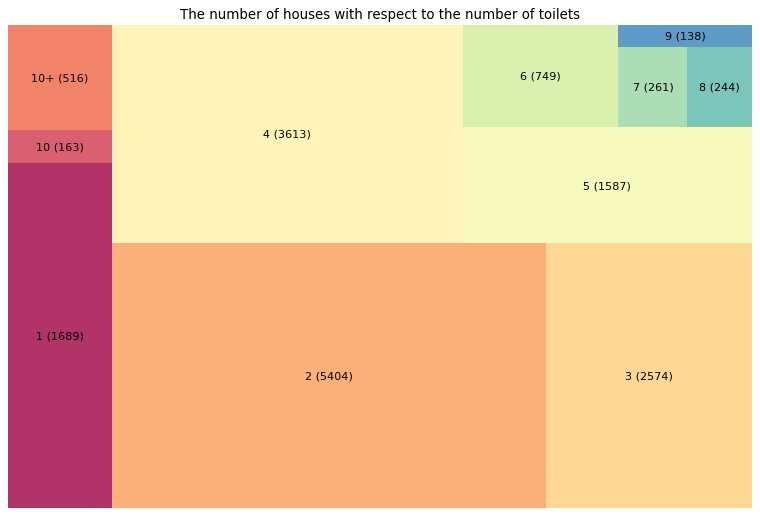

In [762]:
dataframe_for_toilet1 = dataframe[dataframe['Toilets']!='None']
dataframe_for_toilet1=dataframe_for_toilet1.groupby('Toilets').size().reset_index(name='counts')
labels = dataframe_for_toilet1.apply(lambda x: str(x[0]) + " (" + str(x[1]) + ")", axis=1)
sizes = dataframe_for_toilet1['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

plt.title('The number of houses with respect to the number of toilets')
plt.axis('off')
plt.show()

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


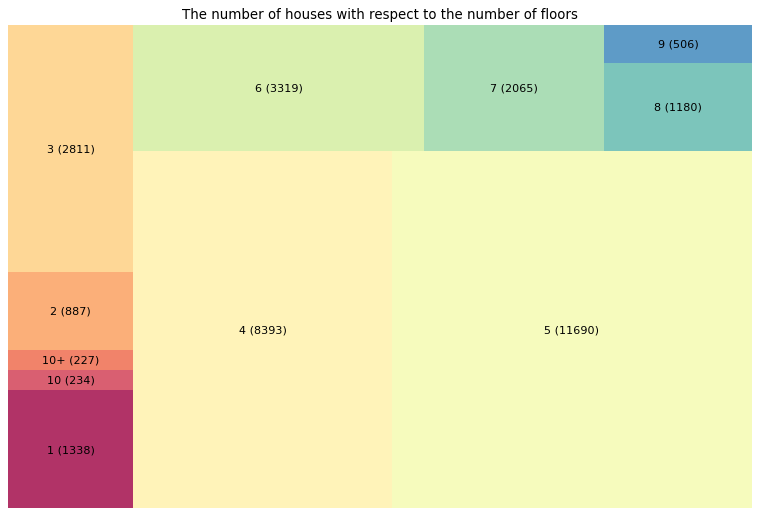

In [763]:
dataframe_for_floor1 = dataframe[dataframe['Floors']!='None']
dataframe_for_floor1=dataframe_for_floor1.groupby('Floors').size().reset_index(name='counts')
labels = dataframe_for_floor1.apply(lambda x: str(x[0]) + " (" + str(x[1]) + ")", axis=1)
sizes = dataframe_for_floor1['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

plt.title('The number of houses with respect to the number of floors')
plt.axis('off')
plt.show()

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-764-09db3a24df7b>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dftmp4 = dftmp4[dataframe['Toilets']!='10+']
<ipython-input-764-09db3a24df7b>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(df_toilet['Toilets'], rotation=60, horizontalalignment= 'right')


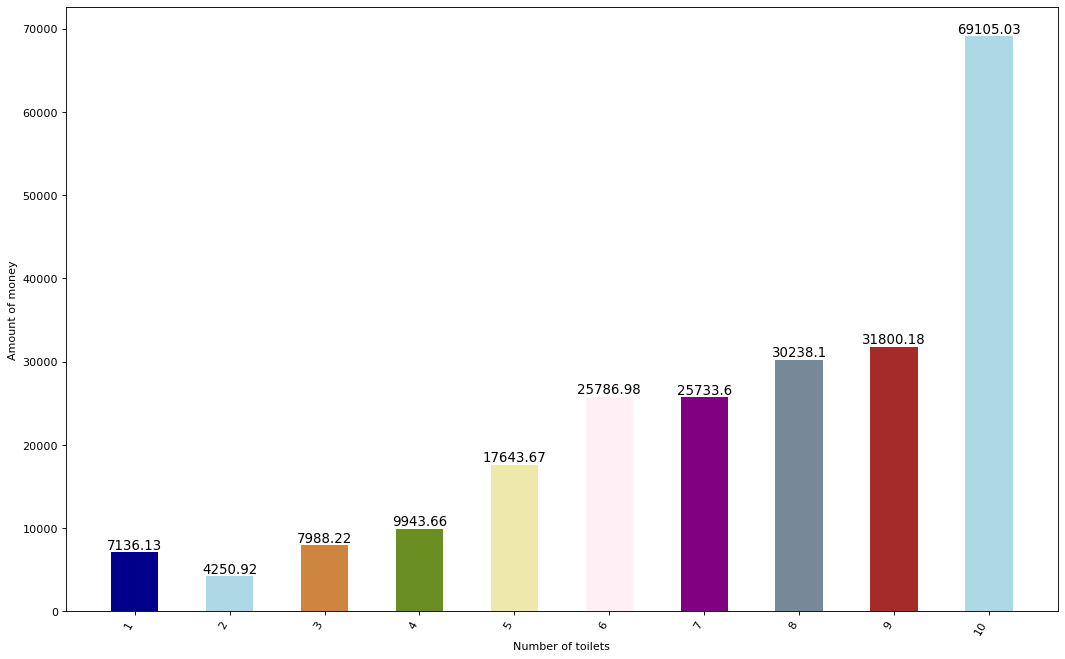

In [764]:
# pic?

dftmp4 = dataframe[dataframe['Toilets']!='None']
dftmp4 = dftmp4[dataframe['Toilets']!='10+']
df_toilet = dftmp4.groupby('Toilets')['Price'].mean().reset_index(name='Amount of money')
df_toilet['order'] = df_toilet['Toilets'].apply(lambda x: int(x))
df_toilet= df_toilet.sort_values(by = 'order') 
df_toilet['Amount of money'] = df_toilet['Amount of money'].apply(lambda x : round(x, 2))
n = df_toilet['Toilets'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df_toilet['Toilets'], df_toilet['Amount of money'], color=c, width=.5)
for i, val in enumerate(df_toilet['Amount of money'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.gca().set_xticklabels(df_toilet['Toilets'], rotation=60, horizontalalignment= 'right')
# plt.title("Average price corresponding to number of toilets", fontsize=22)
plt.ylabel('Amount of money')
plt.xlabel("Number of toilets")
#plt.ylim(25,35)
plt.show()

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-765-7fe98f845e0b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dftmp.copy().corr(), xticklabels=dftmp.corr().columns, yticklabels=dftmp.corr().columns, cmap='RdYlGn', center=0, annot=True)


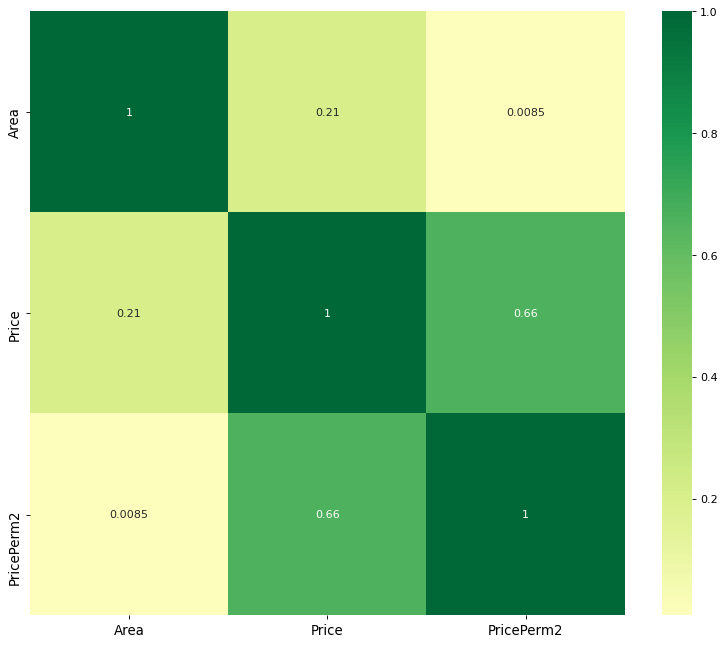

In [765]:
plt.figure(figsize=(12,10), dpi= 80)
dftmp = dataframe.drop(['index', 'X', 'Y'], axis=1)
sns.heatmap(dftmp.copy().corr(), xticklabels=dftmp.corr().columns, yticklabels=dftmp.corr().columns, cmap='RdYlGn', center=0, annot=True)

# plt.title('Correlation matrix between features', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [766]:
#average house price grouped by districs
df_district = dataframe.copy()


/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


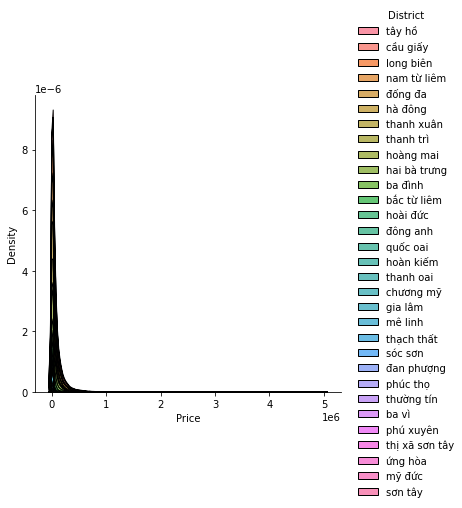

In [767]:
#average house price grouped by districs
df_district = dataframe.copy()
# plt.clf()
sns.displot(df_district, x="Price", hue="District", kind="kde", multiple="stack")
# plt.xlim(0, 100)

In [768]:
print(sns.__version__)

0.11.1


/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<ipython-input-769-e160b02035ea>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(df2['District'], rotation=60, horizontalalignment= 'right')


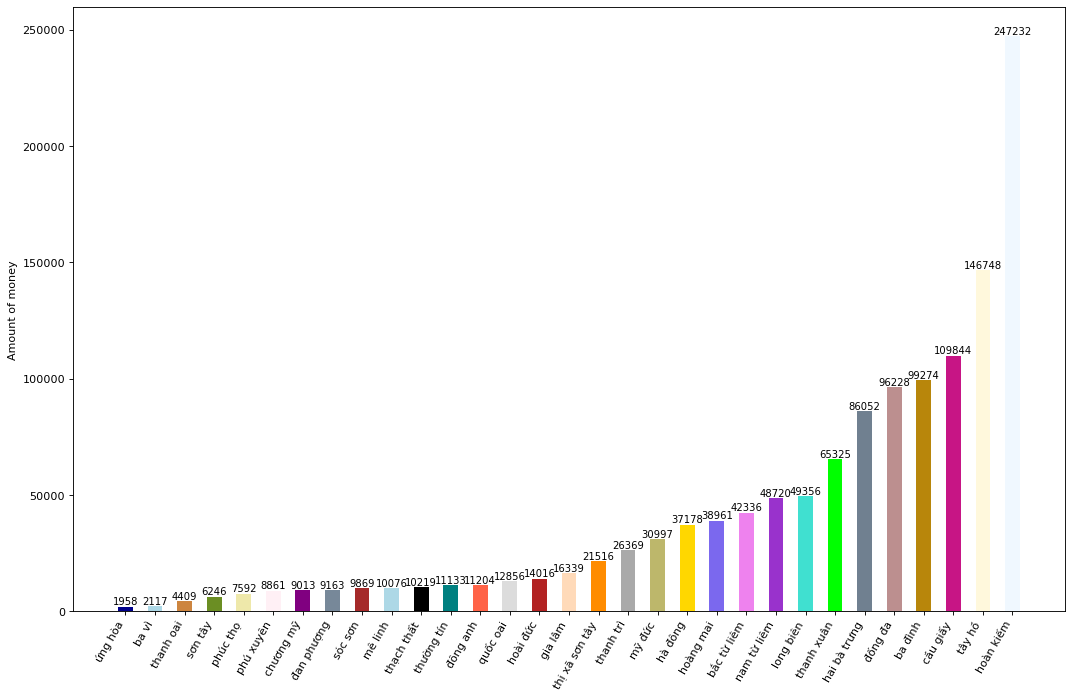

In [769]:
dftmp1 = dataframe[dataframe['District']!='None']
df2 = dftmp1.groupby('District')['Price'].mean().reset_index(name='Amount of money')
df2 = df2.sort_values(by = 'Amount of money') 
df2['Amount of money'] = df2['Amount of money'].apply(lambda x : int(x))
n = df2['District'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df2['District'], df2['Amount of money'], color=c, width=.5)
for i, val in enumerate(df2['Amount of money'].values):
    plt.text(i, val, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})

plt.gca().set_xticklabels(df2['District'], rotation=60, horizontalalignment= 'right')
# plt.title("Average price corresponding to district", fontsize=22)
plt.ylabel('Amount of money')
# plt.ylim(25,35)
plt.show()

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 800x640 with 0 Axes>

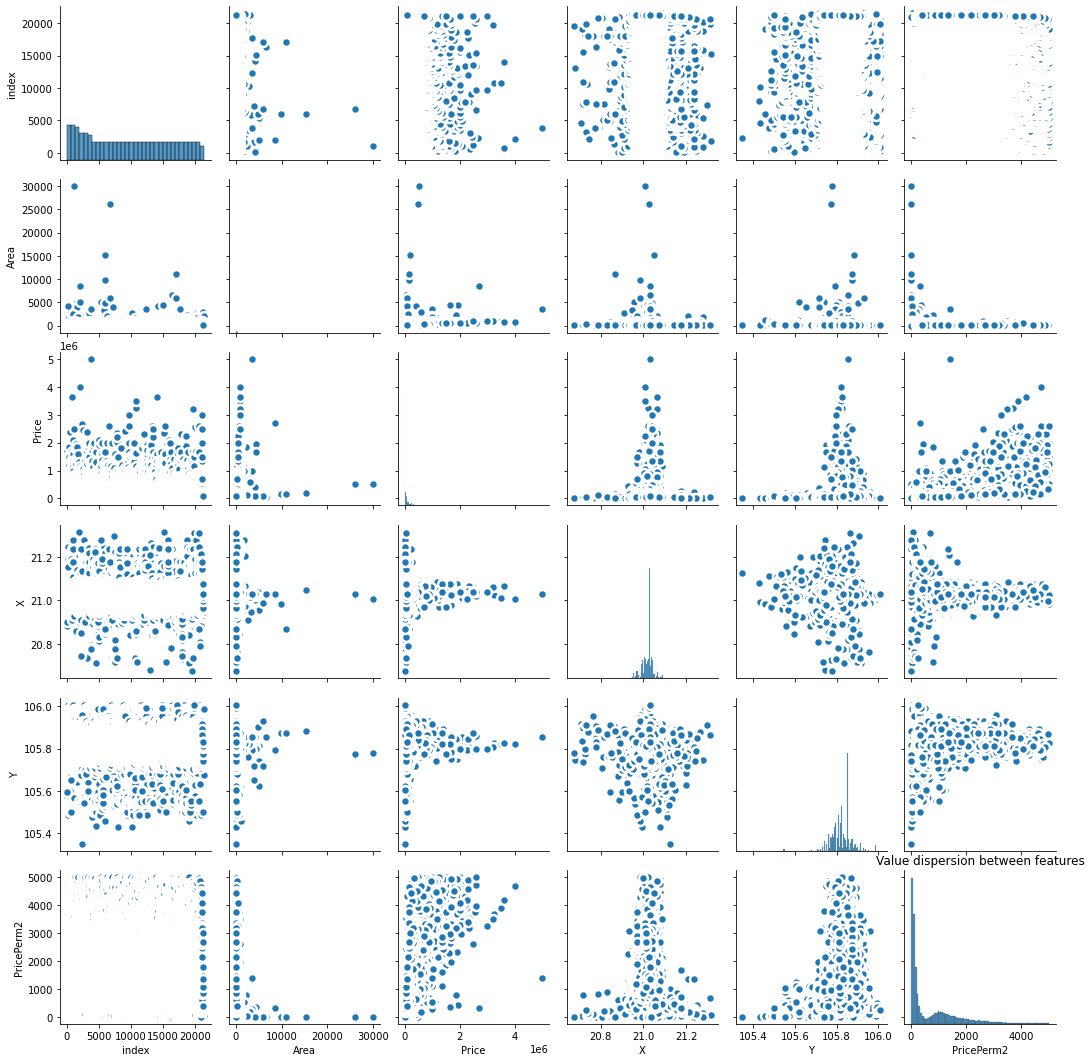

In [770]:
#Chart represeting the relationship between real variables
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(dataframe, kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.title('Value dispersion between features')
plt.show()

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-774-a531b13bffaf>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(df2['HouseDirection'], rotation=60, horizontalalignment= 'right')


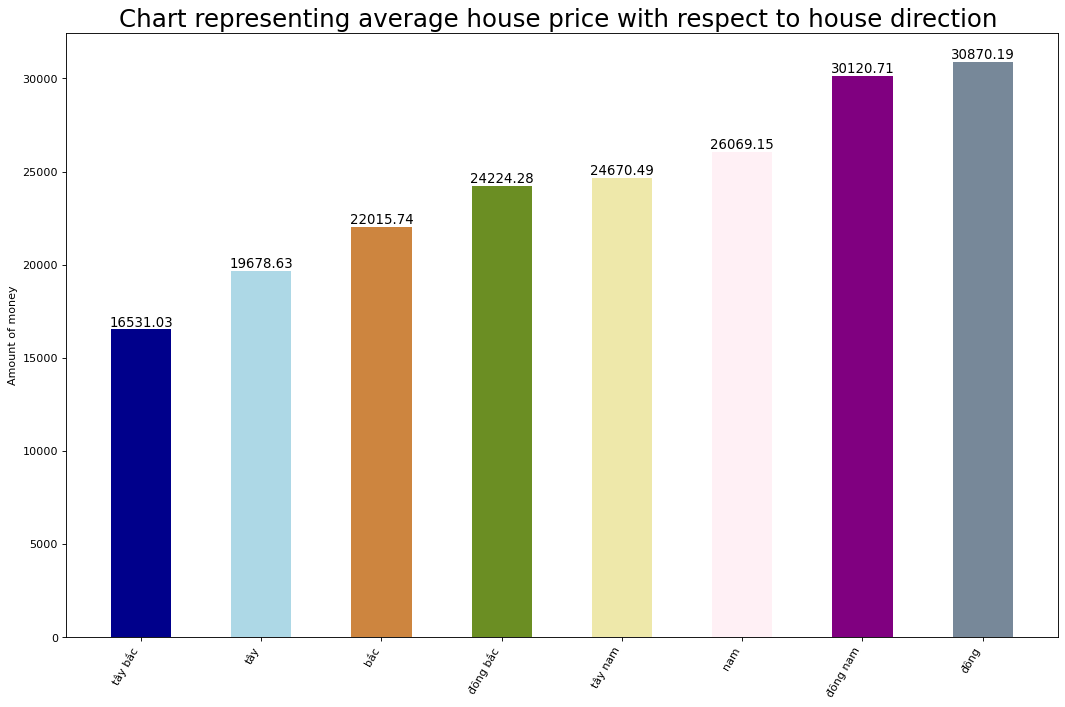

In [774]:
df8 = dataframe[dataframe['HouseDirection']!='None']
df2 = df8.groupby('HouseDirection')['Price'].mean().reset_index(name='Amount of money')
df2 = df2.sort_values(by = 'Amount of money') 
df2['Amount of money'] = df2['Amount of money'].apply(lambda x : round(x, 2))
n = df2['HouseDirection'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df2['HouseDirection'], df2['Amount of money'], color=c, width=.5)
for i, val in enumerate(df2['Amount of money'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.gca().set_xticklabels(df2['HouseDirection'], rotation=60, horizontalalignment= 'right')
plt.title("Chart representing average house price with respect to house direction ", fontsize=22)
plt.ylabel('Amount of money')
#plt.ylim(20,40)
plt.show()

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-775-1e7dd18cdf8a>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(df2['BalconyDirection'], rotation=60, horizontalalignment= 'right')


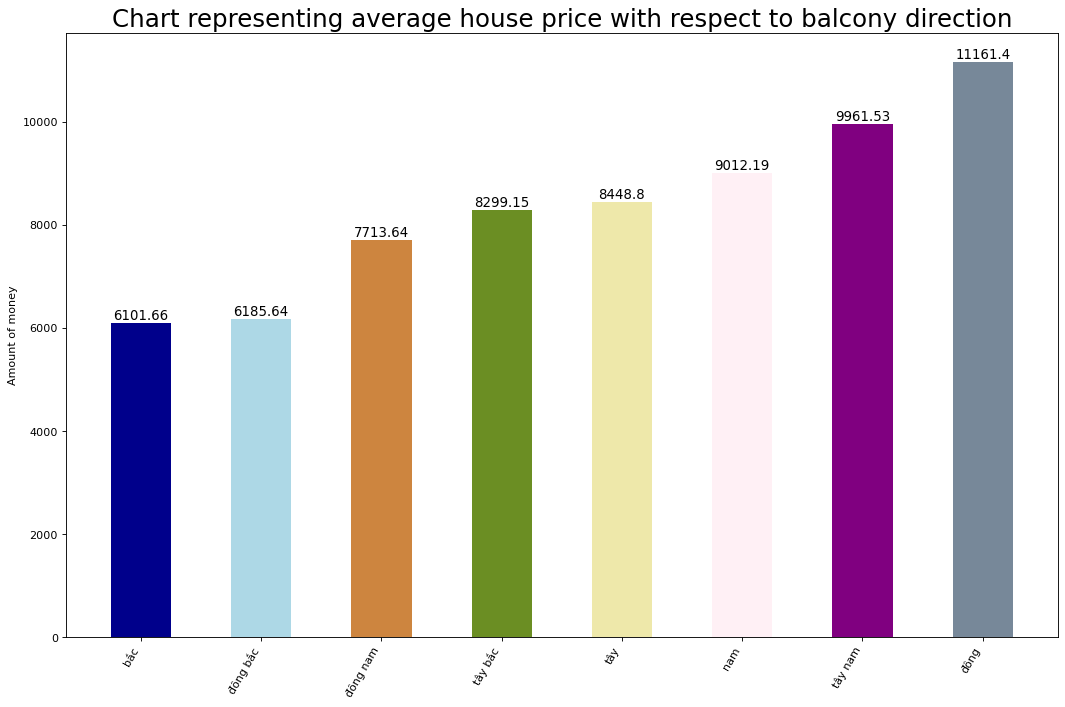

In [775]:
df8 = dataframe[dataframe['BalconyDirection']!='None']
df2 = df8.groupby('BalconyDirection')['Price'].mean().reset_index(name='Amount of money')
df2 = df2.sort_values(by = 'Amount of money') 
df2['Amount of money'] = df2['Amount of money'].apply(lambda x : round(x, 2))
n = df2['BalconyDirection'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df2['BalconyDirection'], df2['Amount of money'], color=c, width=.5)
for i, val in enumerate(df2['Amount of money'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.gca().set_xticklabels(df2['BalconyDirection'], rotation=60, horizontalalignment= 'right')
plt.title("Chart representing average house price with respect to balcony direction", fontsize=22)
plt.ylabel('Amount of money')
#plt.ylim(20,40)
plt.show()

In [773]:
dataframe2 = dataframe
Q1 = dataframe.quantile(0.25)
Q3 = dataframe.quantile(0.75)
IQR = Q3 - Q1
dataframe = dataframe[~((dataframe < (Q1 - 1.5 * IQR)) |(dataframe > (Q3 + 1.5 * IQR))).any(axis=1)]
dataframe.Price.describe()

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: '>' not supported between instances of 'str' and 'int'